In [2]:
import tc_functions as fun
import credentials

ds = fun.gfs_access(2018, 10, 10, 18, credentials.RDA_USER, credentials.RDA_PASSWORD)
dataset = fun.shear_stamp(30.2, -85.4, 800, ds, False, 550)
#dataset = fun.wind_stamp(30.2, -85.4, 800, 850, ds)

In [3]:
fun.vorticity_centroid(30.2, -85.4, 850, 150, 750, ds)

[30.416767, -85.53121948242188]

In [2]:
dataset.attrs

{'long_name': 'Circular stamp of wind data from GFS.',
 'units': 'meters/second',
 'center_lat': 30.2,
 'center_lon': 274.6,
 'pressure_level': 850.0,
 'stamp_radius': 800}

In [3]:
dataset = fun.sectorize(dataset, 0, 1, name = "straight", n_sector = 4)

In [5]:
dataset

<xarray.DataArray '200-850hPa_wind_shear' (component: 3, lat: 59, lon: 68)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * component        (component) <U9 'magnitude' 'u' 'v'
  * lat              (lat) >f4 37.5 37.25 37.0 36.75 ... 23.75 23.5 23.25 23.0
  * lon              (lon) >f4 266.2 266.5 266.8 267.0 ... 282.5 282.8 283.0
    sector_straight  (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 3.0 3.0 3.0 3.0
Attributes:
    long_name:                  200_850 hPa vertical wind shear
    units:                      meters/second
    center_lat:                 30.2
    center_lon:                 274.6
    stamp_radius:               800
    avg_shear:                  (4.1095815, 3.5511723)
    avg_magnitude:              5.431342767466527
    sector_straight_direction:  (0, 1)

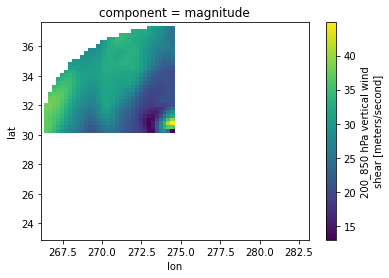

In [6]:
import numpy as np
dataset.where(np.isin(dataset.sector_straight, [1]))[0].plot()

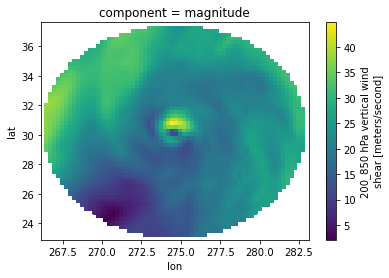

In [11]:
dataset[0].plot()

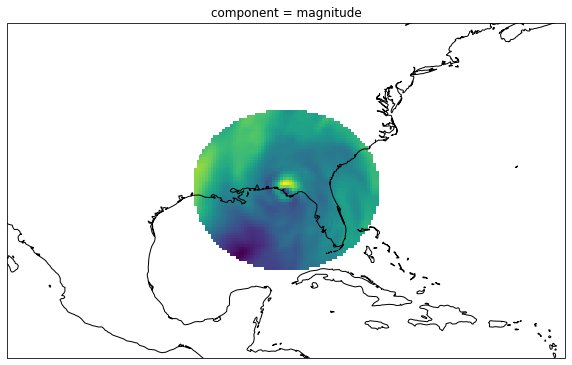

In [12]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 25, center_lon + 25, center_lat - 15, center_lat + 15]

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
dataset.where(np.isin(dataset.sector_straight, [1, 2, 3, 4]))[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.coastlines()
plt.show()

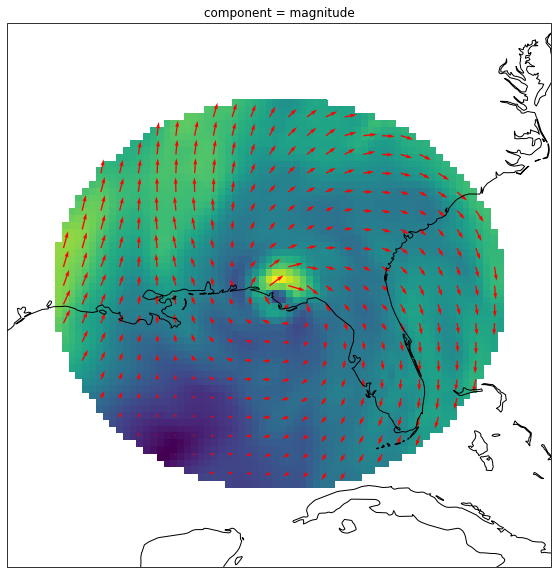

In [13]:
# Fix this plotting mess, then go back to the tc_functions and go back to circular and see if it works there. 

import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 10, center_lon + 10, center_lat - 10, center_lat + 10]

lat = dataset.coords['lat'].values
lon = dataset.coords['lon'].values

lon = np.where(lon > 180, lon - 360, lon)

u = dataset[1].values
v = dataset[2].values

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines('50m')
dataset[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.quiver(lon, lat, u, v, color = "red", transform = ccrs.PlateCarree(), regrid_shape = 30)
ax.plot(277.4362, 14.426229, markersize = 2, marker = 'o', color =  "black", transform = ccrs.PlateCarree())
plt.show()

In [7]:
rp = fun.radial_profile(dataset, stride = 10, h = 35, sector_labels = ["straight"], normalized=True)

ipykernel_launcher:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


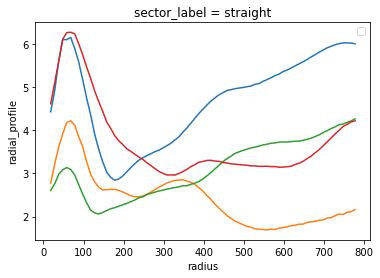

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.plot()
ax = plt.axes()
np.sqrt(np.power(rp[0,:,0],2) + np.power(rp[1,:,0],2)).plot.line(hue = "sector", ax = ax)
ax.legend()

ipykernel_launcher:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


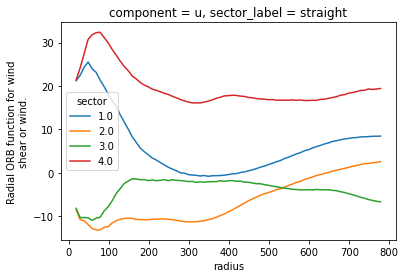

In [41]:
fig = plt.plot()
ax = plt.axes()
rp[0,:,0].plot.line(hue = 'sector', ax = ax)
#ax.legend()

In [2]:
# Get Kim's data and turn it into one file for easy import

import pandas as pd
import hurdat as h

# Import storms since 2015 from Kim's dataset that includes shortest distance to land, and do some maneuvering to make
# things closer to the HURDAT data straight from the website for east integration with the Hurdat() class (like column names, 
# naming convention for unnamed storms, and some additional columns)
nal_15 = pd.read_table("data/DTL_NAL_2015.txt", delimiter = ' ')
nal_16 = pd.read_table("data/DTL_NAL_2016.txt", delimiter = ' ')
nal_17 = pd.read_table("data/DTL_NAL_2017.txt", delimiter = ' ')
nal_18 = pd.read_table("data/DTL_NAL_2018.txt", delimiter = ' ')
nal_19 = pd.read_table("data/DTL_NAL_2019.txt", delimiter = ' ')
enp_15 = pd.read_table("data/DTL_ENP_2015.txt", delimiter = ' ')
enp_16 = pd.read_table("data/DTL_ENP_2016.txt", delimiter = ' ')
enp_17 = pd.read_table("data/DTL_ENP_2017.txt", delimiter = ' ')
enp_18 = pd.read_table("data/DTL_ENP_2018.txt", delimiter = ' ')
enp_19 = pd.read_table("data/DTL_ENP_2019.txt", delimiter = ' ')
total = pd.concat([nal_15, nal_16, nal_17, nal_18, nal_19, enp_15, enp_16, enp_17, enp_18, enp_19], ignore_index = True)

total.columns = ['YEAR', "PART_ID", "NAME", "DATETIME", "LAT", "LON", "WIND", "PRESSURE", "CATEGORY", "DISTANCE"]

total['DATETIME'] = pd.to_datetime(total['DATETIME'], format = "%Y%m%d%H")
total['NAME'] = total['NAME'].str.upper()
name_convert = {'UNNAMED04': 'FOUR', 
                'UNNAMED11': 'ELEVEN',
                'UNNAMED08': 'EIGHT'}
total['NAME'].loc[total['NAME'].str.contains('UNNAMED')] = [name_convert[x] for x in total['NAME'].loc[total['NAME'].str.contains('UNNAMED')]]
total['ID'] = total['PART_ID'] + total['YEAR'].astype(str)
hurdat_all = h.Hurdat(data = total)
# Filter storms by minimum intensity of 50
hurdat = hurdat_all.genesis_to_lysis_filter(minimum_wind = 50, keep_leading_n = 5)
# Add RI / RW labels to all storm observations
hurdat.identify_events(threshold = 25)
# Add 250 km from land restriction as a column
hurdat.distance_to_land_label(min_distance = 250)

/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
hurdat.storms.to_csv('data/filtered_storm_list_keep-leading-5.csv', index = False)

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import credentials
import hurdat as h
import tc_functions as fun
import plotting_functions as tcplt

storm_data = pd.read_csv('data/filtered_storm_list.csv')
storm_data["DATETIME"] = pd.to_datetime(storm_data["DATETIME"])

In [31]:
#for id in unique_storms:
id = "AL152016"
#id = 'AL012015'
storm = storm_data[storm_data['ID'].str.match(id)]
datapoint = storm.iloc[32]

year = datapoint["DATETIME"].year
month = datapoint["DATETIME"].month
day = datapoint["DATETIME"].day
hour = datapoint["DATETIME"].hour

In [32]:
datapoint

YEAR                        2016
PART_ID                     AL15
NAME                      NICOLE
DATETIME     2016-10-13 12:00:00
LAT                         31.6
LON                        -65.3
WIND                         110
PRESSURE                     956
CATEGORY                      HU
DISTANCE                      85
ID                      AL152016
LEADING                    False
RI                         False
RW                          True
NEAR_LAND                   True
Name: 305, dtype: object

In [33]:
gfs_data = fun.gfs_access(year, month, day, hour, 
                            credentials.RDA_USER, credentials.RDA_PASSWORD)

In [34]:
vws = fun.shear_stamp(datapoint["LAT"], datapoint["LON"], 800, gfs_data,
                      vortex_rm = True, vortex_rm_rad = 650)

/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in cos
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in sin
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


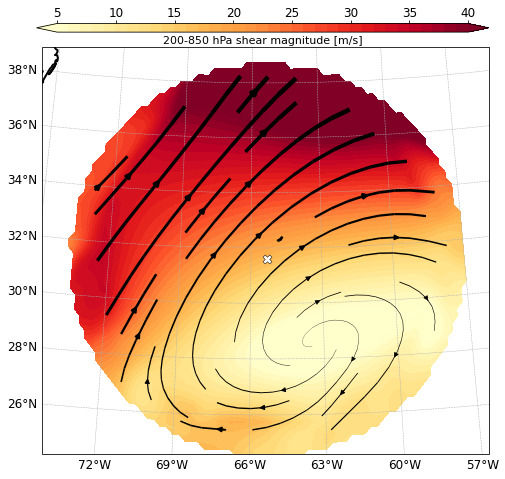

In [35]:
tcplt.shear_map(vws, arrows = False)

In [10]:
a = fun.integrated_circulation(vws, 150)

/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:960: RuntimeWarning: divide by zero encountered in log
  log_magnitude = np.log(shear_magnitude + 1)
/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:797: RuntimeWarning: invalid value encountered in true_divide
  to_subtract = np.multiply(np.divide(dot_ab, dot_aa), a)


In [11]:
np.nanmin(a)

-0.91089076

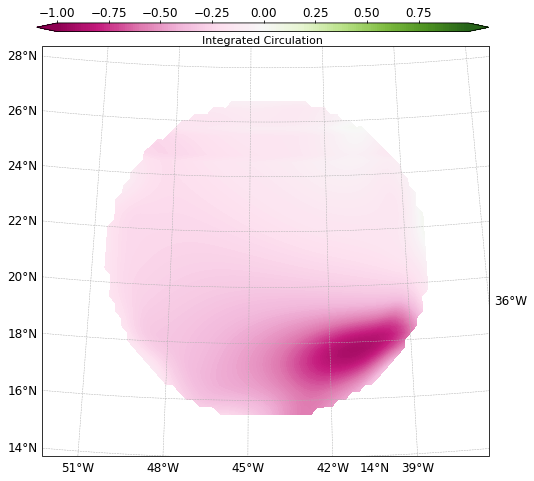

In [24]:
two_shade_map(vws, a, 
                  shading = np.arange(-1.,1.,.01), ticks = np.arange(-1,1,0.25), 
                  savefile = None,
                  legend_title = "Integrated Circulation")

In [218]:
shear_vectors = np.ma.masked_invalid([vws.sel(component = 'u'), vws.sel(component = 'v')])
shear_magnitude = np.sqrt(np.power(shear_vectors[0], 2) + np.power(shear_vectors[1], 2))
log_magnitude = np.log(shear_magnitude + 1)

normed_vectors = np.divide(shear_vectors, shear_magnitude)

curl = np.gradient(normed_vectors[0], axis = 0) - np.gradient(normed_vectors[1], axis = 1) 

ipykernel_launcher:3: RuntimeWarning: divide by zero encountered in log


In [46]:
### Green's function / circulation calculation

# Extract lat/lon grid
lat = vws.lat.values
lon = vws.lon.values
lat_grid, lon_grid = [x.T for x in np.meshgrid(lat, lon)]

In [47]:
lat_grid = np.where(np.logical_not(np.isnan(curl)), lat_grid, np.nan)
lon_grid = np.where(np.logical_not(np.isnan(curl)), lon_grid, np.nan)

In [224]:
r = 150
circulation = np.zeros_like(curl)

tc_center_lat = vws.attrs["center_lat"]
tc_center_lon = vws.attrs["center_lon"]
tc_dist_mat = fun.great_circ_dist(tc_center_lat, tc_center_lon, lat_grid, lon_grid)

for i in range(lat_grid.shape[0]):
    for j in range(lat_grid.shape[1]):
        if tc_dist_mat[i, j] > 800:
            circulation[i,j] = np.nan
        else:
            center_lat = lat_grid[i, j]
            center_lon = lon_grid[i, j]
            dist_mat = fun.great_circ_dist(center_lat, center_lon, lat_grid, lon_grid)

            stamp = np.where(dist_mat < r, curl, np.nan)

            circulation[i,j] = np.nansum(stamp)/np.sum(np.logical_not(np.isnan(stamp)))
        

/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:371: RuntimeWarning: invalid value encountered in sin
  np.sin(lat1_rad) * np.sin(lat2_rad) +
/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:372: RuntimeWarning: invalid value encountered in cos
  np.cos(lat1_rad) * np.cos(lat2_rad) * np.cos(lon1_rad - lon2_rad)
ipykernel_launcher:19: RuntimeWarning: invalid value encountered in true_divide
/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:372: RuntimeWarning: invalid value encountered in arccos
  np.cos(lat1_rad) * np.cos(lat2_rad) * np.cos(lon1_rad - lon2_rad)


/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in cos
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in sin
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


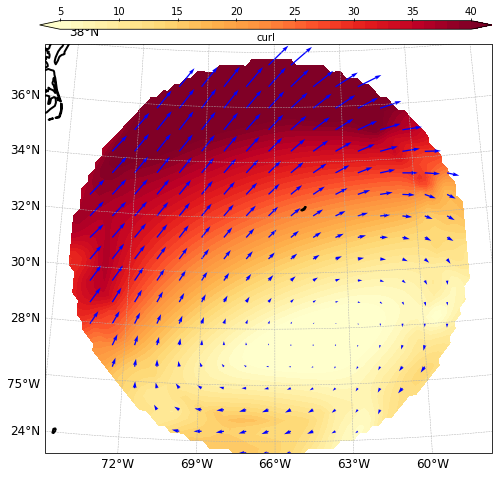

In [7]:
import cartopy.crs as ccrs       # cartopy 0.18.0
import cartopy.feature as cfeature

import matplotlib.pyplot as plt  # matplotlib 3.3.0
import matplotlib.ticker as mticker
import numpy as np               # numpy 1.19.4
import xarray as xr              # xarray 0.16.2

x = vws

tclat = x.attrs["center_lat"]
tclon = x.attrs["center_lon"]
if tclon > 180:
    tclon = tclon - 360

lat_vals = x.lat.values
lon_vals = x.lon.values

glat, glon = [y.T for y in np.meshgrid(lat_vals, lon_vals)]
glon[glon>180.] -= 360.

mag = vws.sel(component = "magnitude").values
u = vws.sel(component = "u").values
v = vws.sel(component = "v").values

plt.ioff()

## Add lat/lon lines and ensure labels occur within the domain at reasonable intervals
def prettylines(clon, clat):
    gl = ax.gridlines(crs=pc, draw_labels=False, linewidth=0.5, linestyle='dashed')
    gl.xlocator = mticker.FixedLocator(np.arange(-180.,1.,3.))
    gl.ylocator = mticker.FixedLocator(np.arange(0.,61.,2.))
    gl2 = ax.gridlines(crs=pc, draw_labels=True, x_inline=False, linewidth=0.)
    gl2.right_labels, gl2.top_labels, gl2.rotate_labels = [False] * 3
    xmin, xmax = [np.ceil((clon-9.)/3.)*3., np.floor((clon+9.)/3.)*3.+1.]
    ymin, ymax = [np.ceil((clat-9.)/2.)*2., np.floor((clat+9.)/2.)*2.+1.]
    gl2.xlocator = mticker.FixedLocator(np.arange(xmin,xmax,3.))
    gl2.ylocator = mticker.FixedLocator(np.arange(ymin,ymax,2.))
    gl2.xlabel_style = {'size': 12}
    gl2.ylabel_style = {'size': 12}

proj = ccrs.LambertConformal(central_longitude=tclon, central_latitude=tclat)
pc = ccrs.PlateCarree()  # required for cartopy to plot dimensions of latitude and longitude

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=proj)
ax.set_extent([np.min(glon),np.max(glon),np.min(glat),np.max(glat)], crs=pc)  # center domain on TC latitude & longitude
ax.coastlines('50m', linewidth=2., zorder=9)
im = ax.contourf(glon, glat, mag, np.arange(5.,40.1,1.), 
                cmap=plt.get_cmap('YlOrRd'), extend='both', transform=pc, zorder=1)  # shading for shear magnitude
pos = ax.get_position()
left = pos.x0 - 0.01
bottom = pos.y1 + 0.025
width = pos.x1 - left
height = 0.015
cax = fig.add_axes([left, bottom, width, height])
cbar = plt.colorbar(im, cax=cax, ticks=np.arange(5.,40.1,5.), orientation='horizontal')
cax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(labelsize=10, pad=0)
cbar.set_label('curl', size=10)
prettylines(tclon, tclat)

ax.quiver(glon, glat, u, v, color = "blue", transform = ccrs.PlateCarree(), regrid_shape = 20)

plt.show()

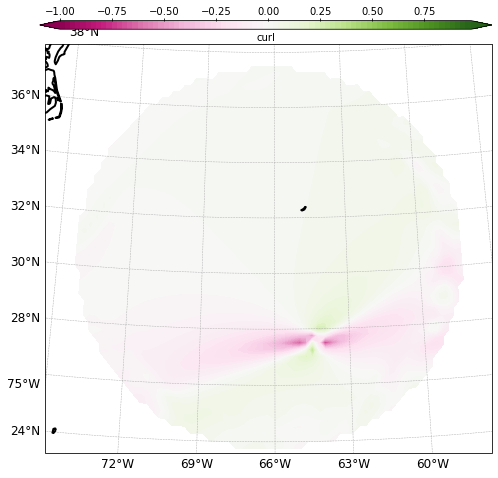

In [230]:
plotty(curl, shading = np.arange(-1,1,0.025), ticks = np.arange(-1,1,0.25))

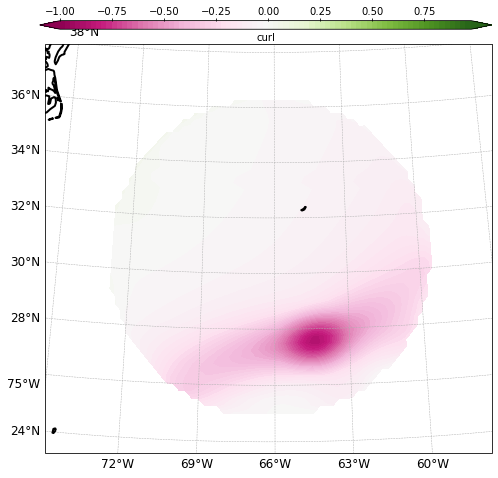

In [217]:
plotty(vortex, shading = np.arange(-1,1,0.025), ticks = np.arange(-1,1,0.25))

In [216]:
np.nanmin(vortex)

-0.872381

ipykernel_launcher:27: RuntimeWarning: invalid value encountered in log
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in cos
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/galen/anaconda3/envs/ada/lib/python3.7/site-packages/cartopy/vector_transform.py:140: RuntimeWarning: invalid value encountered in sin
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


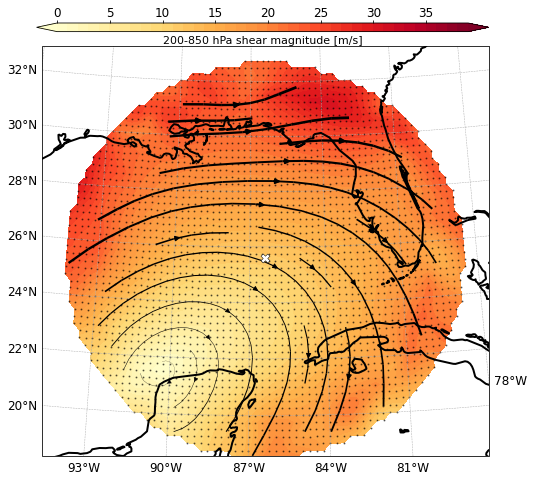

In [18]:
import cartopy.crs as ccrs       # cartopy 0.18.0
import cartopy.feature as cfeature

import matplotlib.pyplot as plt  # matplotlib 3.3.0
import matplotlib.ticker as mticker
import numpy as np               # numpy 1.19.4
import xarray as xr              # xarray 0.16.2

x = vws
contour_array = np.arange(0,40,1)
colorbar_array = np.arange(0,40,5)

tclat = x.attrs["center_lat"]
tclon = x.attrs["center_lon"]
if tclon > 180:
    tclon = tclon - 360

lat_vals = x.lat.values
lon_vals = x.lon.values

glat, glon = [y.T for y in np.meshgrid(lat_vals, lon_vals)]
glon[glon>180.] -= 360.

u = x.sel(component = "u").values
v = x.sel(component = "v").values
mag = x.sel(component = "magnitude").values
log_mag = np.log(mag + 1)

glat_plot = np.where(np.isnan(u), np.nan, glat)
glon_plot = np.where(np.isnan(u), np.nan, glon)

#u = np.divide(u, mag)
#v = np.divide(v, mag)
#mag = np.divide(mag, mag)

#u = np.multiply(np.divide(u, mag), log_mag)
#v = np.multiply(np.divide(v, mag), log_mag)
#mag = np.multiply(np.divide(mag, mag), log_mag)

plt.ioff()

## Add lat/lon lines and ensure labels occur within the domain at reasonable intervals
def prettylines(clon, clat):
    gl = ax.gridlines(crs=pc, draw_labels=False, linewidth=0.5, linestyle='dashed')
    gl.xlocator = mticker.FixedLocator(np.arange(-180.,1.,3.))
    gl.ylocator = mticker.FixedLocator(np.arange(0.,61.,2.))
    gl2 = ax.gridlines(crs=pc, draw_labels=True, x_inline=False, linewidth=0.)
    gl2.right_labels, gl2.top_labels, gl2.rotate_labels = [False] * 3
    xmin, xmax = [np.ceil((clon-9.)/3.)*3., np.floor((clon+9.)/3.)*3.+1.]
    ymin, ymax = [np.ceil((clat-9.)/2.)*2., np.floor((clat+9.)/2.)*2.+1.]
    gl2.xlocator = mticker.FixedLocator(np.arange(xmin,xmax,3.))
    gl2.ylocator = mticker.FixedLocator(np.arange(ymin,ymax,2.))
    gl2.xlabel_style = {'size': 12}
    gl2.ylabel_style = {'size': 12}

proj = ccrs.LambertConformal(central_longitude=tclon, central_latitude=tclat)
pc = ccrs.PlateCarree()  # required for cartopy to plot dimensions of latitude and longitude

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=proj)
ax.set_extent([np.min(glon),np.max(glon),np.min(glat),np.max(glat)], crs=pc)  # center domain on TC latitude & longitude
ax.coastlines('50m', linewidth=2., zorder=9)
im = ax.contourf(glon, glat, mag, contour_array, 
                cmap=plt.get_cmap('YlOrRd'), extend='both', transform=pc, zorder=1)  # shading for shear magnitude
pos = ax.get_position()
left = pos.x0 - 0.01
bottom = pos.y1 + 0.025
width = pos.x1 - left
height = 0.015
cax = fig.add_axes([left, bottom, width, height])
cbar = plt.colorbar(im, cax=cax, ticks=colorbar_array, orientation='horizontal')
cax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(labelsize=12, pad=0)
cbar.set_label('200-850 hPa shear magnitude [m/s]', size=11)
lw = 4. * (mag / 40.)  # scale factor for width of streamlines based on wind speed [m/s]
ax.streamplot(glon, glat, u, v, density=0.6, color='k', 
            linewidth=lw, transform=pc, zorder=5)
ax.scatter(tclon, tclat, s=80, c='w', marker='X', linewidths=0.5, edgecolors='k', transform=pc, zorder=10)
ax.scatter(glon_plot, glat_plot, s=1, c='black', transform=pc, alpha = 0.5)
prettylines(tclon, tclat)

shear_x = x.attrs['avg_shear'][0]
shear_y = x.attrs['avg_shear'][1]
sx, sy = 5*np.array([shear_x, shear_y])/np.linalg.norm([shear_x, shear_y])
#ax.arrow(tclon, tclat, sx, sy, transform = pc, color = "green", width = 0.15)

if 'storm_direction' in x.attrs:
    vel_x = x.attrs['storm_direction'][0]
    vel_y = x.attrs['storm_direction'][1]
    vx, vy = 5*np.array([vel_x, vel_y])/np.linalg.norm([vel_x, vel_y])
    ax.arrow(tclon, tclat, vx, vy, transform = pc, color = "blue", width = 0.15)

plt.show()

In [13]:
np.isnan(u)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [20]:
datapoint

YEAR                        2018
PART_ID                     AL14
NAME                     MICHAEL
DATETIME     2018-10-09 18:00:00
LAT                         25.6
LON                        -86.4
WIND                         100
PRESSURE                     961
CATEGORY                      HU
DISTANCE                     401
ID                      AL142018
LEADING                    False
RI                          True
RW                         False
NEAR_LAND                  False
Name: 865, dtype: object

In [3]:
import tc_functions as fun
import credentials

gfs_data = fun.gfs_access(2016, 12, 12, 0, credentials.RDA_USER, credentials.RDA_PASSWORD)

In [6]:
vws = fun.wind_stamp(70, 70, 800, 200, gfs_data,
                     vortex_rm = False, vortex_rm_rad = 650)

In [7]:
vws

<xarray.DataArray 'wind_stamp' (component: 3, lat: 59, lon: 173)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * component  (component) <U9 'magnitude' 'u' 'v'
  * lat        (lat) >f4 77.25 77.0 76.75 76.5 76.25 ... 63.5 63.25 63.0 62.75
  * lon        (lon) >f4 48.5 48.75 49.0 49.25 49.5 ... 90.75 91.0 91.25 91.5
Attributes:
    long_name:       Circular stamp of wind data from GFS.
    units:           meters/second
    center_lat:      70
    center_lon:      70
    pressure_level:  200.0
    stamp_radius:    800

In [12]:
ic = fun.integrated_circulation(vws, 150, "log")

/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:960: RuntimeWarning: divide by zero encountered in log
  log_magnitude = np.log(shear_magnitude + 1)
/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:797: RuntimeWarning: invalid value encountered in true_divide
  to_subtract = np.multiply(np.divide(dot_ab, dot_aa), a)
/Users/galen/Documents/Research/ADA/tc-wind-shear/tc_functions.py:372: RuntimeWarning: invalid value encountered in arccos
  np.cos(lat1_rad) * np.cos(lat2_rad) * np.cos(lon1_rad - lon2_rad)


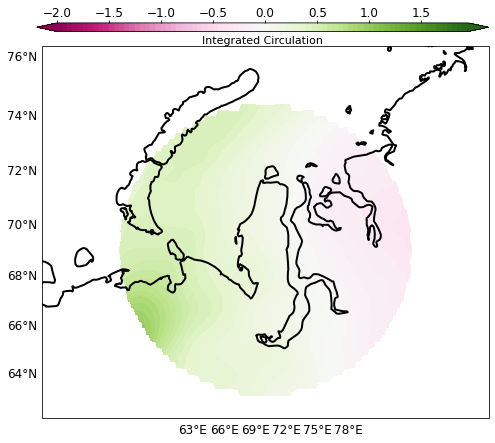

In [14]:
import plotting_functions as tcplt
tcplt.two_shade_map(vws, ic, 
                    shading = np.arange(-2.,2.,.05), 
                    ticks = np.arange(-2.,2.,0.5), 
                    legend_title = "Integrated Circulation")